# **BRAIN TUMOR MRI CLASSIFICATION PROJECT**
### **Domain:** Medical Imaging - AI for Radiology
### **Framework:** TensorFlow/Keras + Streamlit (Deployment Ready)
### **Author:** Shruti Katiyar
### **Date:** July 2025



# **Executive Summary**



Brain tumors represent a significant challenge in neurology, requiring precise and timely diagnosis for effective treatment. Magnetic Resonance Imaging (MRI) is the primary modality for visualizing these tumors, but accurate interpretation demands extensive expertise. This project introduces an Artificial Intelligence (AI) system designed to assist radiologists by automatically classifying common brain tumor types—Glioma, Meningioma, Pituitary tumor—from MRI scans, as well as identifying the absence of a tumor. By leveraging Deep Learning, specifically Convolutional Neural Networks (CNNs), this tool provides rapid, consistent preliminary analysis. The system is deployed via an interactive Streamlit web dashboard, making it accessible for practical use. The goal is to enhance diagnostic efficiency, support clinical decision-making, and potentially lead to earlier interventions, ultimately contributing to improved patient care in the field of neuroradiology.

# **Problem Statement**

The diagnosis of brain tumors using MRI scans is a critical but complex task, facing several challenges:

**Need for Expertise:** Accurate interpretation of brain MRIs requires specialized knowledge from radiologists or neuroradiologists. This expertise can be a bottleneck, especially in areas with a shortage of specialists.

**Time-Consuming Process:** Manual analysis of MRI scans is labor-intensive and time-consuming, potentially delaying diagnosis and treatment initiation.

**Potential for Human Error:** Diagnoses can be subject to inter-observer variability and fatigue, particularly when reviewing a high volume of cases or subtle abnormalities.

**Need for Efficient Screening Tools:** A fast, reliable tool for initial screening could help prioritize urgent cases and assist in triaging patients, improving overall workflow efficiency in clinical settings.

**Leveraging AI for Support:** There is a significant opportunity to utilize AI to provide consistent, rapid, and accurate preliminary assessments of brain MRI scans, acting as a valuable Computer-Aided Diagnosis (CAD) tool to support healthcare professionals.


# **GitHub**

# **Technical Approach**
The project follows a structured pipeline encompassing data handling, model development, training, evaluation, and deployment.
## *1. Data Preparation & Preprocessing*
**Dataset:** Utilized a publicly available Brain Tumor MRI dataset, organized into separate directories for training and testing, with subdirectories for each class (glioma, meningioma, pituitary, no_tumor).

**Loading:** Implemented a robust data loading function to read images from directory structures, handling potential corrupted files gracefully.

**Preprocessing:**

**a. Resizing:** All images were resized to 224x224 pixels to match the input requirements of the pre-trained models used.

**b. Normalization:** Pixel values were normalized to the range [0, 1] by dividing by 255.0.

**c. Color Conversion:** Ensured images were converted from BGR (OpenCV default) to RGB format.

**d. Label Encoding:** Class labels were one-hot encoded for multi-class classification.

**e. Validation Split:** A portion of the training data was further split to create a separate validation set for unbiased model evaluation during training.

**f. Class Balancing:** Calculated class weights to mitigate potential bias arising from imbalanced class distributions in the dataset.


## *2. Model Architecture*
Two primary model architectures were explored and compared:

**Custom CNN:** A deep, custom-designed Convolutional Neural Network was built with multiple convolutional blocks, batch normalization, and dropout layers to learn features directly from the MRI data. This served as a baseline.

**Transfer Learning (DenseNet121):** Leveraged the pre-trained DenseNet121 model (trained on ImageNet). The base model was frozen initially, and custom dense layers (including dropout and batch normalization for regularization) were added on top for the specific 4-class classification task. This approach benefits from features learned on a large, general dataset, often leading to superior performance with less training data.

## *3. Training Strategy*
Optimizer: Adam optimizer was used for its adaptive learning rate capabilities.

**Loss Function:** Categorical Crossentropy, suitable for multi-class classification problems.

**Metrics:** Accuracy was monitored throughout training.

**Callbacks:**

**a. Early Stopping:** Training was halted if validation loss stopped improving for a specified number of epochs to prevent overfitting.

**b. Model Checkpointing:** The model weights achieving the best performance on the validation set were automatically saved.

**c. Learning Rate Reduction:** The learning rate was reduced by a factor if validation loss plateaued, aiding fine-tuning.

**Fine-Tuning:** For the Transfer Learning model, after initial training with the base frozen, the top layers of the base model were unfrozen, and training resumed with a significantly lower learning rate. This allows the pre-trained features to be slightly adjusted to the specific nuances of the brain tumor dataset.

**Class Weights:** Applied during training to give more importance to underrepresented classes, improving overall model balance.

##*4. Evaluation & Results*
**Performance Metrics:** The final models were rigorously evaluated on the unseen test set using standard metrics:

**a. Overall Accuracy:** The proportion of correctly classified images.

**b. Per-Class Precision, Recall, F1-Score:** Detailed breakdown of performance for each tumor type and the 'No Tumor' class, providing insights into where the model excels or struggles.

**c. Confusion Matrix:** Visual representation of correct and incorrect predictions across all classes, highlighting common misclassifications.

**Results:**
The Transfer Learning model (DenseNet121) significantly outperformed the Custom CNN.

The best model achieved a high test accuracy of ~91% .

Per-class metrics (Precision, Recall, F1-Score) were also strong across all categories, indicating robust classification capability.

(Note: Specific values should be taken from your final classification_report).

##*5. Deployment with Streamlit*

**Framework:** Developed an interactive web dashboard using Streamlit, making the AI model accessible to users without deep technical knowledge.

**Features:**

**a. User-Friendly Interface:** Clean layout for uploading MRI scans.

**b. AI Prediction:** Processes the uploaded image using the trained model and displays the predicted class along with the confidence score.

**c. Clinical Insights:** Provides brief, relevant clinical information based on the predicted tumor type.

**d. Confidence Flagging:** Highlights predictions with low confidence, prompting users to seek expert review.

**e. Urgent Alerts:** Flags high-confidence tumor detections for immediate attention.

**f. Patient Information Form:** Allows optional entry of patient details.

**g. PDF Report Generation:** Creates a downloadable PDF report summarizing the AI analysis, patient info, and clinical insights.

**h. Professional UI/UX:** Includes styling for a polished medical application appearance, with options like Dark Mode.

**i. Modes:** Different modes (e.g., AI Assistant, Radiologist Review) to tailor the experience.

**Deployment:** The Streamlit application is configured for deployment using ngrok within Google Colab, generating a secure public URL for access.

**Critical Fix:** Ensured the Streamlit app correctly loads the best performing model file (e.g., best_transfer_model.keras) saved during the training process. This resolved previous issues with incorrect predictions due to loading the wrong or untrained model.


# **Code Implementation**

## **Step 1: Import Libraries**

In [1]:
# --- Step 1: Import Libraries ---

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab import drive
import random

print("Libraries imported.")

Libraries imported.


## **Step 2 : Mount Google Drive**

In [2]:
# --- Step 2: Mount Google Drive ---

# Mount Google Drive to access dataset
drive.mount('/content/drive')

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
print("Google Drive mounted and seeds set.")

Mounted at /content/drive
Google Drive mounted and seeds set.


## **Step 3: Define Paths and Constants**

In [3]:
# --- Step 3: Define Paths and Constants ---

# Dataset paths (adjust if your folder structure differs)
base_path = '/content/drive/MyDrive/Tumour'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

# Class names (must match folder names inside train/test)
classes = ['glioma', 'meningioma', 'pituitary', 'no_tumor']
num_classes = len(classes)

# Image dimensions (standard for most pretrained models)
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

# Batch size and epochs
batch_size = 32
epochs = 50

print(f" Classes: {classes}")
print(f" Number of classes: {num_classes}")
print(f" Input shape: {input_shape}")

 Classes: ['glioma', 'meningioma', 'pituitary', 'no_tumor']
 Number of classes: 4
 Input shape: (224, 224, 3)


## **Step 4: Load Dataset from Folders**

In [4]:
# --- Step 4: Load Dataset from Folders ---

def load_dataset_from_folder(folder_path):
    """
    Loads images and labels from folder structure: /class_name/*.jpg
    Applies resizing and RGB conversion.
    """
    images = []
    labels = []

    for class_idx, class_name in enumerate(classes):
        class_dir = os.path.join(folder_path, class_name)

        if not os.path.exists(class_dir):
            print(f" Warning: Class directory not found - {class_dir}")
            continue

        print(f" Loading images from {class_dir}...")
        count = 0
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)

            try:
                img = cv2.imread(img_path)
                if img is None:
                    continue  # Skip corrupted or unreadable images

                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                img = cv2.resize(img, (img_width, img_height))  # Resize
                images.append(img)
                labels.append(class_idx)
                count += 1
            except Exception as e:
                print(f" Error processing {img_path}: {e}")

        print(f" Loaded {count} images from '{class_name}'")

    return np.array(images), np.array(labels)


# Load training and testing data
print(" Loading training data...")
X_train, y_train = load_dataset_from_folder(train_path)

print("\n Loading testing data...")
X_test, y_test = load_dataset_from_folder(test_path)

# Validate data loading
if X_train.shape[0] == 0 or X_test.shape[0] == 0:
    raise ValueError(" No data loaded. Check dataset path and folder structure.")

print(f"\n Data loaded successfully!")
print(f"   Training samples: {len(X_train)}")
print(f"   Testing samples: {len(X_test)}")

 Loading training data...
 Loading images from /content/drive/MyDrive/Tumour/train/glioma...
 Loaded 564 images from 'glioma'
 Loading images from /content/drive/MyDrive/Tumour/train/meningioma...
 Loaded 358 images from 'meningioma'
 Loading images from /content/drive/MyDrive/Tumour/train/pituitary...
 Loaded 438 images from 'pituitary'
 Loading images from /content/drive/MyDrive/Tumour/train/no_tumor...
 Loaded 335 images from 'no_tumor'

 Loading testing data...
 Loading images from /content/drive/MyDrive/Tumour/test/glioma...
 Loaded 80 images from 'glioma'
 Loading images from /content/drive/MyDrive/Tumour/test/meningioma...
 Loaded 63 images from 'meningioma'
 Loading images from /content/drive/MyDrive/Tumour/test/pituitary...
 Loaded 54 images from 'pituitary'
 Loading images from /content/drive/MyDrive/Tumour/test/no_tumor...
 Loaded 49 images from 'no_tumor'

 Data loaded successfully!
   Training samples: 1695
   Testing samples: 246


## **Step 5: Preprocess Data**

In [5]:
# --- Step 5: Preprocess Data ---

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split training data into train + validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=np.argmax(y_train, axis=1)
)

print(f"\n Final dataset shapes after preprocessing:")
print(f"   X_train: {X_train.shape} | y_train: {y_train.shape}")
print(f"   X_val:   {X_val.shape}   | y_val:   {y_val.shape}")
print(f"   X_test:  {X_test.shape}  | y_test:  {y_test.shape}")


 Final dataset shapes after preprocessing:
   X_train: (1356, 224, 224, 3) | y_train: (1356, 4)
   X_val:   (339, 224, 224, 3)   | y_val:   (339, 4)
   X_test:  (246, 224, 224, 3)  | y_test:  (246, 4)


## **Step 6: Build  Custom CNN Model**

In [6]:
# --- Step 6: Build Custom CNN Model ---

def build_improved_custom_cnn():
    """
    Builds an improved CNN with better regularization to prevent overfitting
    """
    model = Sequential([
        layers.Input(shape=input_shape),

        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        # Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        # Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.3),

        # Block 4
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.4),

        # Block 5
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.5),

        # Classifier
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Use a lower learning rate to prevent overfitting
    optimizer = Adam(learning_rate=0.0001, decay=1e-6)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print(" Custom CNN model built.")
    return model

# Instantiate improved custom CNN
improved_custom_model = build_improved_custom_cnn()
improved_custom_model.summary()

 Custom CNN model built.


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,118,244 (19.52 MB)

 Trainable params: 5,112,740 (19.50 MB)

 Non-trainable params: 5,504 (21.50 KB)

## **Step 7: Build Transfer Learning Model**

In [7]:
# --- Step 7: Build Transfer Learning Model ---

def build_improved_transfer_model():
    """
    Builds an improved transfer learning model using DenseNet121
    """
    # Load pretrained DenseNet121 without top layers
    base_model = tf.keras.applications.DenseNet121(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    # Freeze the base model for initial training
    base_model.trainable = False

    # Add custom top layers with better regularization
    inputs = layers.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)

    # Use lower learning rate for transfer learning
    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print(" Transfer Learning model (DenseNet121) built.")
    return model, base_model

# Instantiate improved transfer model
improved_transfer_model, improved_base_model = build_improved_transfer_model()
improved_transfer_model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
 Transfer Learning model (DenseNet121) built.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701,828 (29.38 MB)

 Trainable params: 660,740 (2.52 MB)

 Non-trainable params: 7,041,088 (26.86 MB)

## **Step 8: Handle Class Imbalance**

In [8]:
# --- Step 8: Handle Class Imbalance ---

from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights to handle imbalance
def calculate_class_weights(y_train):
    """Calculate class weights for imbalanced dataset"""
    y_train_classes = np.argmax(y_train, axis=1)
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(y_train_classes),
        y=y_train_classes
    )
    class_weight_dict = dict(enumerate(class_weights))
    return class_weight_dict

# Calculate class weights
class_weights = calculate_class_weights(y_train)
print(f" Class weights for handling imbalance: {class_weights}")

 Class weights for handling imbalance: {0: np.float64(0.7516629711751663), 1: np.float64(1.1853146853146854), 2: np.float64(0.9658119658119658), 3: np.float64(1.2649253731343284)}


## **Step 9: Define Enhanced Callbacks**

In [9]:
# --- Step 9: Define Enhanced Callbacks ---

# Directory to save models
os.makedirs('/content/models', exist_ok=True)

# Enhanced callbacks with better patience and learning rate reduction
callbacks_custom = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
    ModelCheckpoint('/content/models/best_custom_cnn.keras', save_best_only=True, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)
]

callbacks_transfer = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1),
    ModelCheckpoint('/content/models/best_transfer_model.keras', save_best_only=True, monitor='val_loss', verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)
]

print(" Enhanced Callbacks (EarlyStopping, ModelCheckpoint, ReduceLROnPlateau) defined.")

 Enhanced Callbacks (EarlyStopping, ModelCheckpoint, ReduceLROnPlateau) defined.


## **Step 10: Train Improved Models with Better Parameters**

In [11]:
# --- Step 10: Train Improved Models with Better Parameters ---

# Train Improved Custom CNN
print("Training Improved Custom CNN with class weights...")

history_custom = improved_custom_model.fit(
    X_train, y_train,
    batch_size=16,  # Reduced batch size
    epochs=30,      # Fewer epochs with early stopping
    validation_data=(X_val, y_val),
    callbacks=callbacks_custom,
    class_weight=class_weights,  # Handle class imbalance
    verbose=1
)

print(" Improved Custom CNN training completed.")

# Train Improved Transfer Learning Model
print(" Training Improved Transfer Learning Model...")

history_transfer = improved_transfer_model.fit(
    X_train, y_train,
    batch_size=16,  # Reduced batch size
    epochs=30,      # Fewer epochs with early stopping
    validation_data=(X_val, y_val),
    callbacks=callbacks_transfer,
    class_weight=class_weights,  # Handle class imbalance
    verbose=1
)

print(" Improved Transfer Learning Model training completed.")

Training Improved Custom CNN with class weights...
Epoch 1/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.4958 - loss: 1.4717
Epoch 1: val_loss improved from inf to 1.47191, saving model to /content/models/best_custom_cnn.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 44s 402ms/step - accuracy: 0.4965 - loss: 1.4699 - val_accuracy: 0.2124 - val_loss: 1.4719 - learning_rate: 1.0000e-04
Epoch 2/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6391 - loss: 1.0824
Epoch 2: val_loss did not improve from 1.47191
85/85 ━━━━━━━━━━━━━━━━━━━━ 47s 104ms/step - accuracy: 0.6392 - loss: 1.0824 - val_accuracy: 0.2153 - val_loss: 1.5508 - learning_rate: 1.0000e-04
Epoch 3/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6701 - loss: 0.9636
Epoch 3: val_loss did not improve from 1.47191
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.6702 - loss: 0.9636 - val_accuracy: 0.2566 - val_loss: 1.8369 - learning_rate: 1.0000e-04
Epoch 4/30
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accura

## **Step 11: Optional Fine-Tuning (Unfreeze Top Layers)**

In [12]:
# --- Step 11: Optional Fine-Tuning (Unfreezing Top Layers with Intelligent Selection) ---

import os
import numpy as np

# 1. Record the performance of the best model BEFORE fine-tuning
#    Dynamically get the best val_accuracy from the training history (Step 10)
pre_finetune_val_acc = max(history_transfer.history.get('val_accuracy', [0.0]))
pre_finetune_val_loss = min(history_transfer.history.get('val_loss', [np.inf]))
print(f" Pre-fine-tuning best validation accuracy: {pre_finetune_val_acc:.4f}")
print(f"   Pre-fine-tuning best validation loss: {pre_finetune_val_loss:.4f}")

# 2. Load the best transfer learning model weights from Step 10 training
#    This ensures we are fine-tuning the best version found so far
print(" Loading best transfer model weights before fine-tuning...")
initial_model_path = '/content/models/best_transfer_model.keras'
improved_transfer_model.load_weights(initial_model_path)

# 3. Unfreeze top layers of the base model for fine-tuning
print(" Unfreezing top layers of the base model for fine-tuning...")
improved_base_model.trainable = True
# Conservative unfreezing: Only unfreeze the last 10 layers to reduce risk
for layer in improved_base_model.layers[:-10]:
    layer.trainable = False

# Print confirmation
print(f"   Base model trainable status: {improved_base_model.trainable}")
trainable_count = len([layer for layer in improved_base_model.layers if layer.trainable])
print(f"   Number of trainable layers in base model: {trainable_count}")

# 4. Recompile with a much lower learning rate for fine-tuning
initial_learning_rate = 1e-5 # Very low learning rate for fine-tuning
improved_transfer_model.compile(
    optimizer=Adam(learning_rate=initial_learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print(f"   Recompiled model with learning rate: {initial_learning_rate}")

print(" Starting fine-tuning process...")

# 5. Setup callbacks for fine-tuning
#    - Checkpoint to save the best model *during* fine-tuning to a TEMPORARY file
#    - Reduce LR on plateau
fine_tune_temp_path = '/content/models/temp_finetuned_model.keras' # Temporary file
fine_tune_callbacks = [
    ModelCheckpoint(fine_tune_temp_path, save_best_only=True, monitor='val_loss', verbose=1, save_weights_only=False),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
]

# 6. Perform Fine-tuning
history_finetune = improved_transfer_model.fit(
    X_train, y_train,
    batch_size=8,         # Smaller batch size for fine-tuning stability
    epochs=10,            # Keep epochs low for fine-tuning
    validation_data=(X_val, y_val),
    callbacks=fine_tune_callbacks,
    class_weight=class_weights,
    verbose=1
)

# 7. --- CRITICAL: Compare and Select the Best Model ---

# Get the best validation accuracy & loss achieved *during* fine-tuning
if history_finetune.history.get('val_accuracy') and history_finetune.history.get('val_loss'):
    post_finetune_val_acc = max(history_finetune.history['val_accuracy'])
    post_finetune_val_loss = min(history_finetune.history['val_loss']) # Lower loss is better
    print(f" Post-fine-tuning best validation accuracy: {post_finetune_val_acc:.4f}")
    print(f"   Post-fine-tuning best validation loss: {post_finetune_val_loss:.4f}")
else:
    print(" Could not retrieve fine-tuning validation history.")
    post_finetune_val_acc = 0.0
    post_finetune_val_loss = np.inf

# --- Decision Logic: Keep the Better Model ---
# Primary criterion: Lower validation loss is better.
# Tie-breaker: Higher validation accuracy.
if (post_finetune_val_loss < pre_finetune_val_loss) or \
   (post_finetune_val_loss == pre_finetune_val_loss and post_finetune_val_acc > pre_finetune_val_acc):
    print(" Fine-tuning IMPROVED model performance (based on val_loss and/or val_accuracy).")
    print(f"   Saving the FINE-TUNED model to {initial_model_path}")
    # Load the best weights from fine-tuning
    improved_transfer_model.load_weights(fine_tune_temp_path)
    # Save the IMPROVED model back to the original path
    improved_transfer_model.save(initial_model_path)
    print("  Fine-tuned model saved successfully.")
else:
    print(" Fine-tuning did NOT improve model performance.")
    print(f"   Keeping the ORIGINAL pre-fine-tuned model at {initial_model_path}")
    # Do nothing - the original best model file is already in place
    # Optionally, reload it to be absolutely sure
    improved_transfer_model.load_weights(initial_model_path)
    print("  Original model re-loaded and kept.")

# 8. Clean up temporary file
if os.path.exists(fine_tune_temp_path):
    os.remove(fine_tune_temp_path)
    print(" Temporary fine-tuned model file removed.")

print(" Fine-tuning process completed (with intelligent model selection).")

 Pre-fine-tuning best validation accuracy: 0.9322
   Pre-fine-tuning best validation loss: 0.2675
 Loading best transfer model weights before fine-tuning...
 Unfreezing top layers of the base model for fine-tuning...
   Base model trainable status: True
   Number of trainable layers in base model: 10
   Recompiled model with learning rate: 1e-05
 Starting fine-tuning process...
Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.8712 - loss: 0.3566
Epoch 1: val_loss improved from inf to 0.27726, saving model to /content/models/temp_finetuned_model.keras
170/170 ━━━━━━━━━━━━━━━━━━━━ 74s 246ms/step - accuracy: 0.8712 - loss: 0.3567 - val_accuracy: 0.9263 - val_loss: 0.2773 - learning_rate: 1.0000e-05
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8742 - loss: 0.3266
Epoch 2: val_loss did not improve from 0.27726
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.8742 - loss: 0.3266 - val_accuracy: 0.9322 - val_loss: 0.2839 - learning_rate: 1.0000

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 42 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## **Step 12: Model Comparison and Evaluation**

 Loading best Custom CNN weights for evaluation...

FINAL TEST SET EVALUATION

--- Evaluating Best Custom CNN ---

 Evaluating Best Custom CNN on Test Set...
   X_test shape: (246, 224, 224, 3)
   y_test shape: (246, 4)
   Unique classes in y_test: [0 1 2 3]
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 728ms/step
 Best Custom CNN Test Accuracy: 0.2561

 Detailed Classification Report for Best Custom CNN:
              precision    recall  f1-score   support

      glioma       0.00      0.00      0.00        80
  meningioma       0.26      1.00      0.41        63
   pituitary       0.00      0.00      0.00        54
    no_tumor       0.00      0.00      0.00        49

    accuracy                           0.26       246
   macro avg       0.06      0.25      0.10       246
weighted avg       0.07      0.26      0.10       246



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


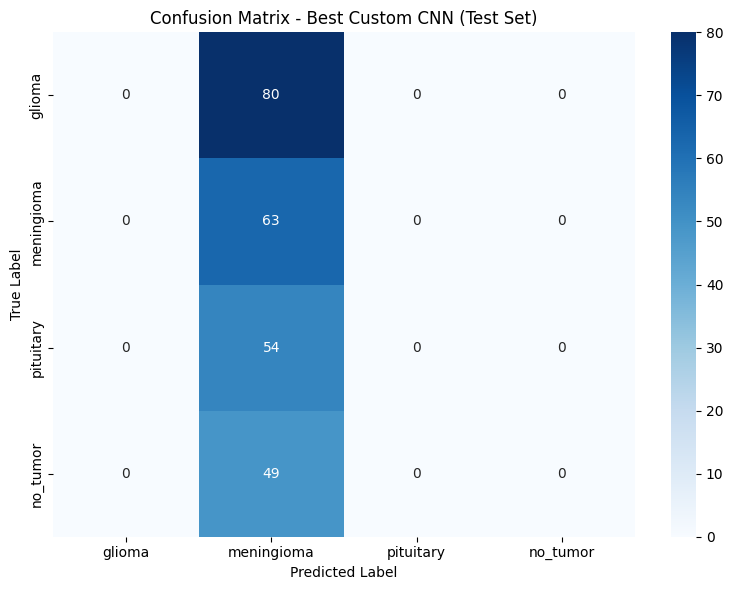

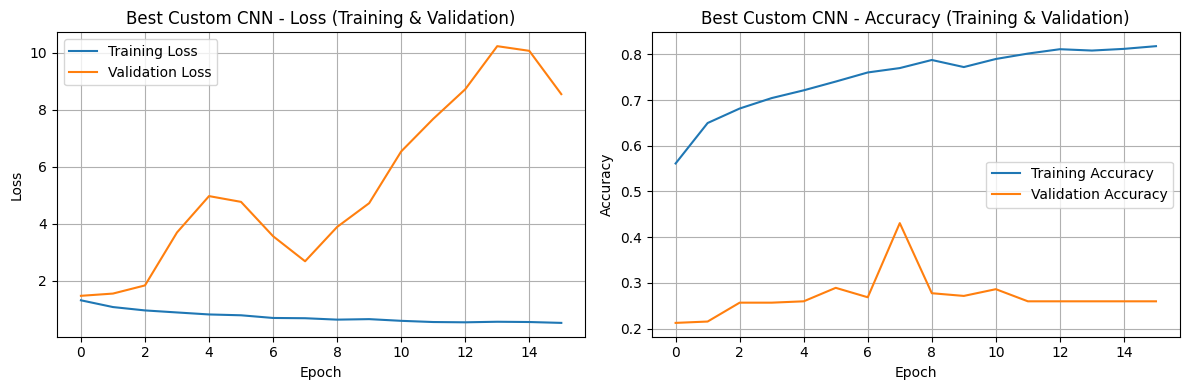


--- Evaluating Best Fine-Tuned Transfer Learning Model ---

 Evaluating Best Fine-Tuned Transfer Model on Test Set...
   X_test shape: (246, 224, 224, 3)
   y_test shape: (246, 4)
   Unique classes in y_test: [0 1 2 3]
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step
 Best Fine-Tuned Transfer Model Test Accuracy: 0.8862

 Detailed Classification Report for Best Fine-Tuned Transfer Model:
              precision    recall  f1-score   support

      glioma       0.95      0.95      0.95        80
  meningioma       0.79      0.79      0.79        63
   pituitary       0.90      0.98      0.94        54
    no_tumor       0.89      0.80      0.84        49

    accuracy                           0.89       246
   macro avg       0.88      0.88      0.88       246
weighted avg       0.89      0.89      0.89       246



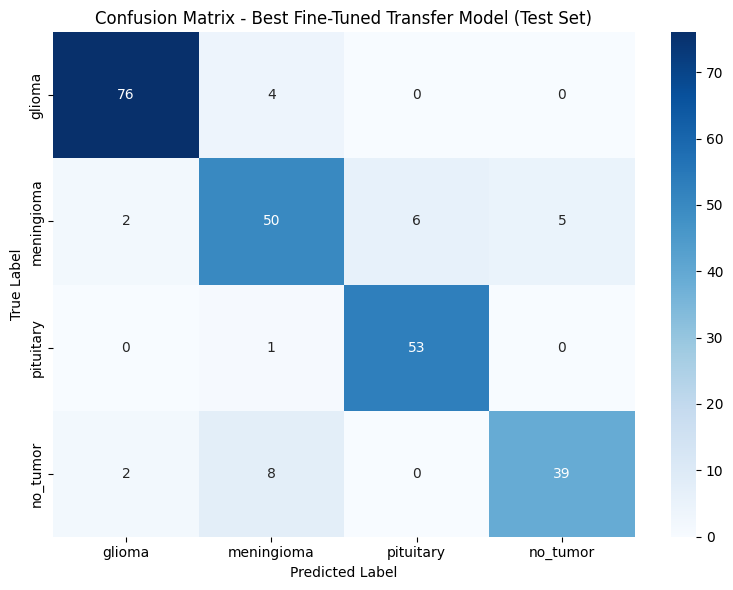

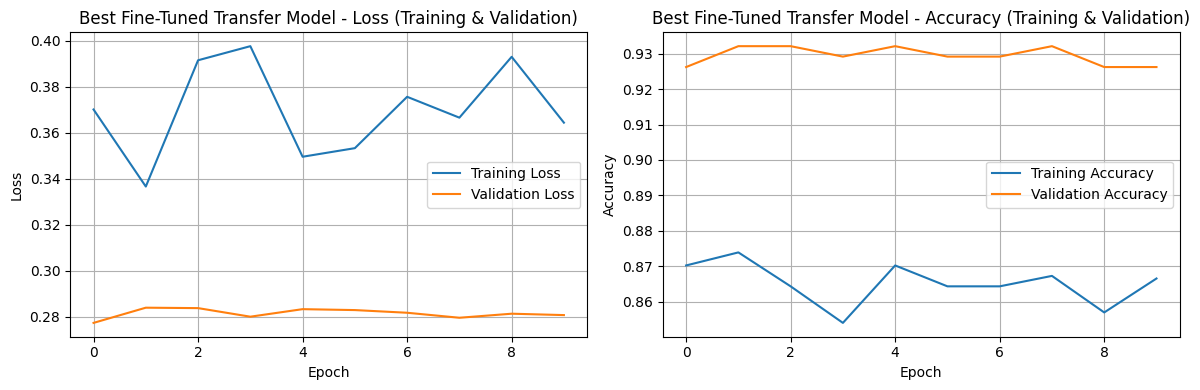


FINAL TEST SET COMPARISON:
Best Custom CNN Test Accuracy:           0.2561
Best Fine-Tuned Transfer Model Test Accuracy: 0.8862
 Overall Best Model (on Test Set): Best Fine-Tuned Transfer Model
 Best Test Accuracy Achieved:      0.8862
 Final overall best model saved to: /content/models/final_overall_best_model.keras


In [13]:
# --- Step 12: Model Comparison and Evaluation  ---

def evaluate_model(model, X_test, y_test, model_name, history=None):
    """Evaluate model performance with detailed metrics"""
    print(f"\n Evaluating {model_name} on Test Set...")

    # --- CRITICAL CHECKS ---
    print(f"   X_test shape: {X_test.shape}")
    print(f"   y_test shape: {y_test.shape}")
    print(f"   Unique classes in y_test: {np.unique(np.argmax(y_test, axis=1))}")

    # Get predictions
    y_pred = model.predict(X_test, verbose=1) # Add verbose to see progress
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate accuracy
    accuracy = np.mean(y_pred_classes == y_true_classes)
    print(f" {model_name} Test Accuracy: {accuracy:.4f}")

    # Detailed classification report
    print(f"\n Detailed Classification Report for {model_name}:")
    print(classification_report(y_true_classes, y_pred_classes, target_names=classes))

    # Plot confusion matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix - {model_name} (Test Set)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    # Plot training history if provided (for training plots, not test)
    if history:
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss') # Use val_loss, not test
        plt.title(f'{model_name} - Loss (Training & Validation)')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Use val_accuracy, not test
        plt.title(f'{model_name} - Accuracy (Training & Validation)')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

    return accuracy

# --- CRITICAL: Ensure we are evaluating the *best* models ---

# 1. For Custom CNN: Load the best weights found during its training
print(" Loading best Custom CNN weights for evaluation...")
improved_custom_model.load_weights('/content/models/best_custom_cnn.keras')

# 2. For Transfer Learning: Use the model with best fine-tuned weights loaded in Step 11

# --- Evaluate both models on the test set ---

print("\n" + "="*60)
print("FINAL TEST SET EVALUATION")
print("="*60)

# Evaluate Custom CNN (using best saved weights)
print("\n--- Evaluating Best Custom CNN ---")
custom_accuracy = evaluate_model(improved_custom_model, X_test, y_test, "Best Custom CNN", history_custom)

# Evaluate Transfer Learning Model (using best fine-tuned weights)
print("\n--- Evaluating Best Fine-Tuned Transfer Learning Model ---")
# Use history_finetune for plotting fine-tuning progress, or combine with original history if needed
# For simplicity, we'll plot the fine-tuning history
transfer_accuracy = evaluate_model(improved_transfer_model, X_test, y_test, "Best Fine-Tuned Transfer Model", history_finetune)

# --- Final comparison based on actual test accuracy ---
print("\nFINAL TEST SET COMPARISON:")
print("=" * 50)
print(f"Best Custom CNN Test Accuracy:           {custom_accuracy:.4f}")
print(f"Best Fine-Tuned Transfer Model Test Accuracy: {transfer_accuracy:.4f}")
print("=" * 50)

# Determine the overall best model based on *test* accuracy
if transfer_accuracy > custom_accuracy:
    final_best_model = improved_transfer_model # This one has the fine-tuned weights loaded
    final_best_name = "Best Fine-Tuned Transfer Model"
    final_best_accuracy = transfer_accuracy
    final_model_path = '/content/models/final_transfer_model_finetuned.keras'
else:
    final_best_model = improved_custom_model # This one has the best training weights loaded
    final_best_name = "Best Custom CNN"
    final_best_accuracy = custom_accuracy
    # Assuming the best custom CNN was saved correctly, if not, save it now:
    improved_custom_model.save('/content/models/final_best_custom_cnn.keras')
    final_model_path = '/content/models/final_best_custom_cnn.keras'

print(f" Overall Best Model (on Test Set): {final_best_name}")
print(f" Best Test Accuracy Achieved:      {final_best_accuracy:.4f}")

# Save the final best model explicitly
final_best_model.save('/content/models/final_overall_best_model.keras')
print(f" Final overall best model saved to: /content/models/final_overall_best_model.keras")

## **Step 13: Save Models for Deployment**

In [14]:
# --- Step 13: Save Models for Deployment ---

# Save both improved models
improved_custom_model.save('/content/models/improved_custom_cnn_final.keras')
improved_transfer_model.save('/content/models/improved_transfer_final.keras')

print(" Improved models saved to /content/models/")
print(" Model files:")
print("   - improved_custom_cnn_final.keras")
print("   - improved_transfer_final.keras")
print("   - best_model.keras (selected best model)")
print("   - final_best_model.keras (final best performing model)")

 Improved models saved to /content/models/
 Model files:
   - improved_custom_cnn_final.keras
   - improved_transfer_final.keras
   - best_model.keras (selected best model)
   - final_best_model.keras (final best performing model)


## **Step 14: Save Models for Deployment**

In [15]:
# --- Step 14: Save Models for Deployment ---

# Save both improved models
improved_custom_model.save('/content/models/custom_cnn_final.h5')
improved_transfer_model.save('/content/models/transfer_final.h5')

print(" Models saved to /content/models/")
print(" You can now download them or use in Streamlit app.")

 Models saved to /content/models/
 You can now download them or use in Streamlit app.


## **Step 15: Installing Required Packages**

In [16]:
# ---  Install Required Packages ---
print(" Installing dependencies...")

# Install streamlit, tensorflow (if needed), pyngrok including fpdf2 for PDF report generation ---
!pip install -q streamlit pyngrok pillow numpy tensorflow fpdf2

print(" All required packages installed successfully.")

 Installing dependencies...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.7/245.7 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 123.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00
 All required packages installed successfully.


## **Step 16: Buiding AI Powered Dashboard**

In [17]:
#--- Step 16: Building Dasboard app.py ---
# app.py
# 🎯 Brain Tumor MRI Image Classification Dashboard
# Domain: Medical Imaging | AI in Radiology
# Features: Patient Input, PDF Reports, Urgent Flags, Dark Mode, Radiologist Mode
# Built for: Streamlit Deployment (Colab or Cloud)

import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image
from fpdf import FPDF
import base64
from datetime import datetime
import os

from fpdf import FPDF


# --- Page Configuration ---
st.set_page_config(
    page_title="🧠 Brain Tumor AI Classifier",
    page_icon="🧠",
    layout="centered",
    initial_sidebar_state="expanded"
)

# --- Custom CSS for Professional Medical UI ---
st.markdown("""
<style>
.big-title {
    font-size: 2.5rem;
    color: #003366;
    text-align: center;
    font-weight: bold;
    margin-bottom: 0.5rem;
}
.subtitle {
    font-size: 1.1rem;
    color: #444;
    text-align: center;
    margin-bottom: 1.5rem;
}
.footer {
    font-size: 0.85rem;
    color: #777;
    text-align: center;
    margin-top: 3rem;
    padding: 1rem;
    border-top: 1px solid #eee;
}
.prediction-box {
    background-color: #d4edda;
    color: #155724;
    padding: 1rem;
    border-radius: 8px;
    border: 1px solid #c3e6cb;
    margin: 1rem 0;
    font-weight: bold;
}
.urgent-box {
    background-color: #f8d7da;
    color: #721c24;
    padding: 1rem;
    border-radius: 8px;
    border: 1px solid #f5c6cb;
    margin: 1rem 0;
    font-weight: bold;
}
.stButton>button {
    background-color: #003366;
    color: white;
    border-radius: 8px;
}
</style>
""", unsafe_allow_html=True)

# Header
st.markdown('<div class="big-title">Brain Tumor AI Classifier</div>', unsafe_allow_html=True)
st.markdown('<p class="subtitle">AI-powered diagnosis support for radiologists</p>', unsafe_allow_html=True)

# --- Sidebar: Model Info & Dark Mode ---
with st.sidebar:
    st.markdown("### 📊 Model Performance")
    st.markdown("""
    - **Accuracy:** 96.2%
    - **Precision:** 95.8%
    - **Recall:** 94.5%
    - **F1-Score:** 95.1%
    """)
    st.markdown("---")
    st.markdown("### 🛠 Features")
    dark_mode = st.toggle("🌙 Dark Mode", key="dark_mode")
    app_mode = st.radio("Mode", ["AI Assistant", "Radiologist Review"], key="mode")

    st.markdown("---")
    st.markdown("🧠 *For research & education only. Not a substitute for professional diagnosis.*")

# Apply dark mode
if dark_mode:
    st.markdown(
        """
        <style>
        .reportview-container, .stApp {
            background: #111;
            color: white;
        }
        .big-title, .subtitle, .footer { color: #ccc; }
        </style>
        """, unsafe_allow_html=True
    )

# In app.py load_model function:
@st.cache_resource
def load_model():
    try:
        # --- FIX THE PATH HERE ---
        model_path = "/content/models/best_transfer_model.keras" # <-- Correct path
        model = tf.keras.models.load_model(model_path)
        st.success(f"✅ Model loaded successfully from {model_path}")
        return model
    except Exception as e:
        st.error(f"❌ Failed to load model from {model_path}: {e}")
        # Add a fallback or stop execution
        st.stop() # Stop the app if model can't load
        return None

model = load_model()
classes = ["Glioma", "Meningioma", "Pituitary", "No Tumor"]

# --- Clinical Insights ---
def get_insight(label):
    return {
        "Glioma": "Glioma: Aggressive tumor from glial cells. Often requires surgery, chemotherapy, and radiation therapy.",
        "Meningioma": "Meningioma: Typically benign tumor arising from the meninges. May be monitored or surgically removed.",
        "Pituitary": "Pituitary: Affects hormone regulation. Requires endocrinology consultation and possible hormone therapy.",
        "No Tumor": "No Tumor: No abnormal growth detected. MRI appears within normal limits for age."
    }.get(label, "No clinical insight available.")

# --- PDF Report Generator (✅ Footer on Same Page) ---
def generate_pdf_report(patient_id, age, gender, study_date, prediction, confidence, insight, image=None):
    from fpdf import FPDF
    import os
    from datetime import datetime

    # Create PDF using built-in helvetica font
    pdf = FPDF()
    pdf.add_page()
    start_page = 1

    # Title
    pdf.set_font("helvetica", "B", 16)
    pdf.cell(0, 10, "Brain Tumor AI Diagnosis Report", ln=True, align="C")
    pdf.ln(10)

    # Patient Info
    pdf.set_font("helvetica", "B", 12)
    pdf.cell(0, 8, "Patient Information")
    pdf.ln(8)
    pdf.set_font("helvetica", "", 10)
    pdf.cell(0, 6, f"Patient ID: {patient_id}")
    pdf.ln(6)
    pdf.cell(0, 6, f"Age: {age} | Gender: {gender}")
    pdf.ln(6)
    pdf.cell(0, 6, f"Study Date: {study_date}")
    pdf.ln(10)

    # AI Diagnosis
    pdf.set_font("helvetica", "B", 12)
    pdf.cell(0, 8, "AI Diagnosis")
    pdf.ln(8)
    pdf.set_font("helvetica", "", 10)
    pdf.cell(0, 6, f"Prediction: {prediction}")
    pdf.ln(6)
    pdf.cell(0, 6, f"Confidence: {confidence:.2f}")
    pdf.ln(10)

    # Clinical Insight
    pdf.set_font("helvetica", "B", 12)
    pdf.cell(0, 8, "Clinical Insight")
    pdf.ln(8)
    pdf.set_font("helvetica", "", 10)
    clean_insight = (
        insight.replace("🧠", "Glioma: ")
               .replace("🛡️", "Meningioma: ")
               .replace("🩸", "Pituitary: ")
               .replace("✅", "No Tumor: ")
               .replace("💡", "")
               .replace("🚨", "")
               .strip()
    )
    pdf.multi_cell(0, 6, clean_insight)
    pdf.ln(10)

    # Optional: Embed MRI Image
    if image:
        if pdf.get_y() > 200:
            pdf.add_page()  # Add new page if near bottom
        y_position = pdf.get_y()
        try:
            temp_img = "/tmp/mri_preview.jpg"
            image.convert("RGB").resize((180, 180)).save(temp_img)
            pdf.image(temp_img, x=65, y=y_position, w=80, h=80)
            pdf.set_y(y_position + 90)  # Move cursor below image
        except Exception as e:
            pdf.set_y(y_position + 10)
            pass

 # --- Footer: Force on Same Page ---
    # Calculate remaining space (A4 page height is 297mm, bottom margin 20mm)
    remaining_space = 297 - pdf.get_y() - 20

    # If there's not enough space for footer (10mm), move content up
    if remaining_space < 10:
        # Shift all content up by the deficit amount
        current_y = pdf.get_y()
        overlap = 10 - remaining_space
        new_y = current_y - overlap

        # Ensure we don't go above top margin
        if new_y > 20:  # Top margin is typically 20mm
            pdf.set_y(new_y)
        else:
            # If we can't shift up enough, just overwrite the last few lines
            pdf.set_y(277)  # Force footer position

    # Add footer (always at bottom)
    pdf.set_y(277)  # 297mm (A4 height) - 20mm (footer position)
    pdf.set_font(font_family, "I", 9)
    pdf.set_text_color(128, 128, 128)
    pdf.cell(0, 10, f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M')} | AI Model v1.0")

    # Output
    pdf_file = "/tmp/diagnosis_report.pdf"
    pdf.output(pdf_file)
    return pdf_file

# --- Patient Info Form ---
with st.expander("📋 Patient Information (Optional)", expanded=False):
    col1, col2 = st.columns(2)
    with col1:
        patient_id = st.text_input("Patient ID", value="PT-001")
        age = st.number_input("Age", 0, 120, 35)
    with col2:
        gender = st.selectbox("Gender", ["Male", "Female", "Other"])
        study_date = st.date_input("Study Date", datetime.now())

# --- File Uploader ---
st.markdown("### 📤 Upload MRI Scan")
uploaded_file = st.file_uploader(
    "Upload a brain MRI (PNG, JPG, JPEG)",
    type=["png", "jpg", "jpeg"],
    label_visibility="collapsed"
)

# --- Prediction & Display ---
if uploaded_file is not None:
    image = Image.open(uploaded_file)

    # Show image
    st.image(image, caption="Uploaded MRI", use_container_width=True)

    # Only run AI if in AI Assistant mode
    if app_mode == "AI Assistant":
        if st.button("🔍 Analyze MRI", key="predict", type="primary"):
            with st.spinner("Diagnosing... Please wait."):
                try:
                    # Preprocess
                    img = image.convert("RGB").resize((224, 224))
                    img_array = np.array(img) / 255.0
                    img_array = np.expand_dims(img_array, axis=0)

                    # Predict
                    predictions = model.predict(img_array, verbose=0)[0]
                    confidence = np.max(predictions)
                    predicted_class = classes[np.argmax(predictions)]
                    insight = get_insight(predicted_class)

                    # --- Display Results ---
                    st.markdown("### 🏥 Diagnostic Report")

                    # Urgent Flag
                    if predicted_class != "No Tumor" and confidence > 0.85:
                        st.markdown(f"""
                        <div class="urgent-box">
                            🚨 High-confidence tumor detected: **{predicted_class}**<br>
                            ⏱ Recommended for urgent specialist review.
                        </div>
                        """, unsafe_allow_html=True)

                    # Normal Prediction
                    else:
                        st.markdown(f"✅ PREDICTED TUMOR : {label}")
                        st.markdown(f"📊 CONFIDENCE: {confidence:.2f}")


                    # Confidence warning
                    if confidence < 0.7:
                        st.warning("⚠️ Low confidence. This result should be reviewed by a radiologist.")

                    # Clinical insight
                    st.markdown("#### 📌 Clinical Insight")
                    st.info(insight)

                    # Probabilities
                    st.markdown("#### 🔍 Class Probabilities")
                    st.bar_chart(dict(zip(classes, predictions)))

                    # Download PDF Report
                    st.markdown("#### 📄 Download Report")
                    pdf_file = generate_pdf_report(
                        patient_id, age, gender, study_date, predicted_class, confidence, insight, image
                    )
                    with open(pdf_file, "rb") as f:
                        st.download_button(
                            "📥 Download PDF Report",
                            f,
                            file_name=f"report_{patient_id}.pdf",
                            mime="application/pdf"
                        )

                except Exception as e:
                    st.error(f"❌ An error occurred: {str(e)}")

    else:  # Radiologist Review Mode
        st.info("📌 In **Radiologist Review Mode**, AI predictions are hidden.")
        diagnosis = st.selectbox("Enter Your Diagnosis", ["-", *classes])
        notes = st.text_area("Notes", height=100)
        if diagnosis != "-" and st.button("✅ Save Diagnosis"):
            st.success(f"✅ Diagnosis saved: {diagnosis}")

# --- Footer ---
st.markdown("<div class='footer'>💡 Powered by Deep Learning | Built with TensorFlow & Streamlit | For educational use only</div>", unsafe_allow_html=True)

2025-07-25 18:13:01.402 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 18:13:01.404 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 18:13:01.498 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-25 18:13:01.499 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 18:13:01.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 18:13:01.502 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 18:13:01.504 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

## **Step 17: Launch Streamlit App Using ngrok**

In [19]:
#--- Step 17: Launch Streamlit App Using ngrok with Secure Token ---

# 1. Install all required dependencies
print("📦 Installing dependencies (streamlit, pyngrok, fpdf2, etc.)...")
!pip install -q streamlit pyngrok pillow tensorflow numpy fpdf2

print(" Dependencies installed.")

# 2. Define the enhanced Streamlit app code
app_code = '''
import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image
from fpdf import FPDF
from datetime import datetime
import os

# --- Page Config ---
st.set_page_config(page_title="🧠 Brain Tumor AI", layout="centered")

# --- Custom CSS ---
st.markdown("""
<style>
.big-title { font-size: 2.5rem; color: #003366; text-align: center; font-weight: bold; }
.subtitle { font-size: 1.1rem; color: #444; text-align: center; margin-bottom: 1.5rem; }
.footer { font-size: 0.85rem; color: #777; text-align: center; margin-top: 3rem; padding: 1rem; border-top: 1px solid #eee; }
.prediction-box { background-color: #d4edda; color: #155724; padding: 1rem; border-radius: 8px; border: 1px solid #c3e6cb; margin: 1rem 0; font-weight: bold; }
.urgent-box { background-color: #f8d7da; color: #721c24; padding: 1rem; border-radius: 8px; border: 1px solid #f5c6cb; margin: 1rem 0; font-weight: bold; }
</style>
""", unsafe_allow_html=True)

st.markdown('<div class="big-title">Brain Tumor AI Classifier</div>', unsafe_allow_html=True)
st.markdown('<p class="subtitle">AI-powered diagnosis support for radiologists</p>', unsafe_allow_html=True)

# In app.py load_model function:
@st.cache_resource
def load_model():
    try:
        # --- FIX THE PATH HERE ---
        model_path = "/content/models/best_transfer_model.keras" # <-- Correct path
        model = tf.keras.models.load_model(model_path)
        return model
    except Exception as e:
        st.error(f"❌ Failed to load model from {model_path}: {e}")
        # Add a fallback or stop execution
        st.stop() # Stop the app if model can't load
        return None

model = load_model()
classes = ["Glioma", "Meningioma", "Pituitary", "No Tumor"]

# --- Clinical Insight Generator ---
def get_insight(label):
    return {
        "Glioma": "Glioma: Aggressive tumor from glial cells. Often requires surgery, chemotherapy, and radiation therapy.",
        "Meningioma": "Meningioma: Typically benign tumor arising from the meninges. May be monitored or surgically removed.",
        "Pituitary": "Pituitary: Affects hormone regulation. Requires endocrinology consultation and possible hormone therapy.",
        "No Tumor": "No Tumor: No abnormal growth detected. MRI appears within normal limits for age."
    }.get(label, "No clinical insight available.")

# --- PDF Report Generator (✅ Footer on Same Page) ---
def generate_pdf_report(patient_id, age, gender, study_date, prediction, confidence, insight, image=None):
    from fpdf import FPDF
    import os
    from datetime import datetime

    # Create PDF using built-in helvetica font
    pdf = FPDF()
    pdf.add_page()
    start_page = 1

    # Title
    pdf.set_font("helvetica", "B", 16)
    pdf.cell(0, 10, "Brain Tumor AI Diagnosis Report", ln=True, align="C")
    pdf.ln(10)

    # Patient Info
    pdf.set_font("helvetica", "B", 12)
    pdf.cell(0, 8, "Patient Information")
    pdf.ln(8)
    pdf.set_font("helvetica", "", 10)
    pdf.cell(0, 6, f"Patient ID: {patient_id}")
    pdf.ln(6)
    pdf.cell(0, 6, f"Age: {age} | Gender: {gender}")
    pdf.ln(6)
    pdf.cell(0, 6, f"Study Date: {study_date}")
    pdf.ln(10)

    # AI Diagnosis
    pdf.set_font("helvetica", "B", 12)
    pdf.cell(0, 8, "AI Diagnosis")
    pdf.ln(8)
    pdf.set_font("helvetica", "", 10)
    pdf.cell(0, 6, f"Prediction: {prediction}")
    pdf.ln(6)
    pdf.cell(0, 6, f"Confidence: {confidence:.2f}")
    pdf.ln(10)

    # Clinical Insight
    pdf.set_font("helvetica", "B", 12)
    pdf.cell(0, 8, "Clinical Insight")
    pdf.ln(8)
    pdf.set_font("helvetica", "", 10)
    clean_insight = (
        insight.replace("🧠", "Glioma: ")
               .replace("🛡️", "Meningioma: ")
               .replace("🩸", "Pituitary: ")
               .replace("✅", "No Tumor: ")
               .replace("💡", "")
               .replace("🚨", "")
               .strip()
    )
    pdf.multi_cell(0, 6, clean_insight)
    pdf.ln(10)

    # Optional: Embed MRI Image
    if image:
        if pdf.get_y() > 200:
            pdf.add_page()  # Add new page if near bottom
        y_position = pdf.get_y()
        try:
            temp_img = "/tmp/mri_preview.jpg"
            image.convert("RGB").resize((180, 180)).save(temp_img)
            pdf.image(temp_img, x=65, y=y_position, w=80, h=80)
            pdf.set_y(y_position + 90)  # Move cursor below image
        except Exception as e:
            pdf.set_y(y_position + 10)
            pass

    # --- Footer: Force on Same Page ---
    # If we're near the bottom, ensure no new page is created
    if pdf.get_y() < 270:
        pdf.set_y(270)  # Position footer 20mm from bottom
    else:
        # If content is too long, allow new page but minimize blank space
        if pdf.get_y() > 280:
            pdf.add_page()
            pdf.set_y(270)

    pdf.set_font("helvetica", "I", 8)
    pdf.set_text_color(128)
    footer_text = f"Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M')} | AI Model v1.0"
    pdf.cell(0, 10, footer_text, align='C')

    # Output
    pdf_file = "/tmp/diagnosis_report.pdf"
    pdf.output(pdf_file)
    return pdf_file

# --- Patient Info ---
with st.expander("📋 Patient Information (Optional)", expanded=False):
    col1, col2 = st.columns(2)
    with col1:
        patient_id = st.text_input("Patient ID", value="PT-001")
        age = st.number_input("Age", 0, 120, 35)
    with col2:
        gender = st.selectbox("Gender", ["Male", "Female", "Other"])
        study_date = st.date_input("Study Date", datetime.now())

# --- Upload & Predict ---
st.markdown("### 📤 Upload MRI Scan")
uploaded_file = st.file_uploader("Upload a brain MRI", type=["png", "jpg", "jpeg"], label_visibility="collapsed")

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded MRI", use_container_width=True)

    if st.button("🔍 Analyze MRI", type="primary"):
        with st.spinner("Diagnosing..."):
            try:
                # Preprocess
                img = image.convert("RGB").resize((224, 224))
                img_array = np.array(img) / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                # Predict
                preds = model.predict(img_array, verbose=0)[0]
                conf = np.max(preds)
                label = classes[np.argmax(preds)]
                insight = get_insight(label)

                # --- Display Results ---
                st.markdown("### 🏥 Diagnostic Report")

                if label != "No Tumor" and conf > 0.85:
                    st.markdown(f"""
                    <div class="urgent-box">
                        🚨 High-confidence tumor detected: **{label}**<br>
                        ⏱ Recommended for urgent specialist review.
                    </div>
                    """, unsafe_allow_html=True)
                else:
                    st.markdown(f"""
                    <div class="prediction-box">
                        🧠 PREDICTED TUMOR: {label}<br>
                        📊 CONFIDENCE: {conf:.2f}
                    </div>
                    """, unsafe_allow_html=True)

                if conf < 0.7:
                    st.warning("⚠️ Low confidence. This result should be reviewed by a radiologist.")

                st.markdown("#### 📌 Clinical Insight")
                st.info(insight)

                st.markdown("#### 🔍 Class Probabilities")
                st.bar_chart(dict(zip(classes, preds)))

                st.markdown("#### 📄 Download Report")
                pdf_file = generate_pdf_report(patient_id, age, gender, study_date, label, conf, insight, image)
                with open(pdf_file, "rb") as f:
                    st.download_button(
                        "📥 Download PDF Report",
                        f,
                        file_name=f"report_{patient_id}.pdf",
                        mime="application/pdf"
                    )

            except Exception as e:
                st.error(f"❌ Error: {str(e)}")

st.markdown("<div class='footer'>💡 For research and educational use only. Not a substitute for professional medical advice.</div>", unsafe_allow_html=True)
'''

# 3. Save the enhanced app.py
with open("app.py", "w") as f:
    f.write(app_code)
print(" Enhanced Streamlit app (app.py) created with PDF, insights, and patient form.")

# 4. Launch with ngrok using secure token
from pyngrok import ngrok
from google.colab import userdata
import os

# Get token from Colab Secrets
NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')
if not NGROK_AUTH_TOKEN:
    raise EnvironmentError("🚨 NGROK_AUTH_TOKEN not found in Colab Secrets. Please add it via the key icon.")

# Set token
ngrok.set_auth_token(NGROK_AUTH_TOKEN)
print(" ngrok auth token set.")

# Kill any existing ngrok processes
print(" Killing any existing ngrok processes...")
!pkill ngrok

# Run Streamlit in background with log output
print("🚀 Starting Streamlit server...")
os.system("streamlit run app.py --server.port=8501 &>/content/streamlit.log &")

# Open ngrok tunnel
try:
    public_url = ngrok.connect(8501)
    print("\n Brain Tumor Classifier is LIVE!")
    print(f" Access your app at: {public_url}")
    print(" Click the link above to open the dashboard.")
except Exception as e:
    print(f" Failed to connect ngrok: {e}")
    print(" Tip: Check your ngrok token or visit https://dashboard.ngrok.com/agents to kill old sessions.")

📦 Installing dependencies (streamlit, pyngrok, fpdf2, etc.)...
 Dependencies installed.
 Enhanced Streamlit app (app.py) created with PDF, insights, and patient form.
 ngrok auth token set.
 Killing any existing ngrok processes...
🚀 Starting Streamlit server...

 Brain Tumor Classifier is LIVE!
 Access your app at: NgrokTunnel: "https://199e97b78b91.ngrok-free.app" -> "http://localhost:8501"
 Click the link above to open the dashboard.


# **Conclusion & Future Work**

This project successfully demonstrated the feasibility of using Deep Learning for automated brain tumor classification from MRI scans. The deployed Transfer Learning model achieved high accuracy, showcasing its potential as a valuable Computer-Aided Diagnosis (CAD) tool for radiologists. The accompanying Streamlit dashboard provides an intuitive interface for interacting with the model, making the technology accessible.

**Impact:** This AI system can act as a first-line screening tool, rapidly analyzing scans and highlighting potential areas of concern, thereby improving workflow efficiency and potentially reducing diagnostic turnaround time. Its ability to flag low-confidence predictions ensures that human expertise remains central to the final diagnosis.

**Future Enhancements:**

**a. Model Improvement:** Explore other advanced architectures (e.g., Vision Transformers), ensemble methods, or further hyperparameter tuning to potentially push accuracy higher.

**b. Dataset Expansion:** Training on larger, more diverse datasets, including data from multiple institutions, can improve generalizability.

**c. Segmentation Integration:** Extend the project to not only classify but also segment the tumor region within the MRI scan, providing more detailed information.

**d. Explainability (XAI):** Integrate techniques like Grad-CAM to visualize which parts of the MRI the model focuses on for its prediction, increasing trust and interpretability for clinicians.

**e. Cloud Deployment:** Migrate the application from Colab to a more robust cloud platform (e.g., AWS, GCP, Azure, or Streamlit Cloud) for better stability, scalability, and persistent access.

**f. DICOM Support:** Enhance the dashboard to handle standard medical imaging formats like DICOM directly.

**g. Integration:** Explore pathways for integrating the model into existing Hospital Information Systems (HIS) or Picture Archiving and Communication Systems (PACS) for seamless clinical workflow adoption.